In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install opencv-python
!pip install cmake
!pip install dlib
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=dc4b284db401025968939b39e7f1b05748cb58c3b83f14a94e701a39b8dbad50
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr
import cv2
import numpy as np
import os

from google.colab.patches import cv2_imshow

In [ ]:
path = "gdrive/My Drive/DGT301/input/train/"

known_names = []
known_name_encodings = []

images = os.listdir(path)
for _ in images:
    image = fr.load_image_file(path + _)
    image_path = path + _
    encoding = fr.face_encodings(image)[0]

    known_name_encodings.append(encoding)
    known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

print(known_names)

['Thor', 'Bruce', 'Clint', 'Steve', 'Tony', 'Natasha']


In [ ]:
test_image = "gdrive/My Drive/DGT301/input/test/test_2.jpg"
image = cv2.imread(test_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_name_encodings, face_encoding)
    name = ""

    face_distances = fr.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    if matches[best_match]:
        name = known_names[best_match]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

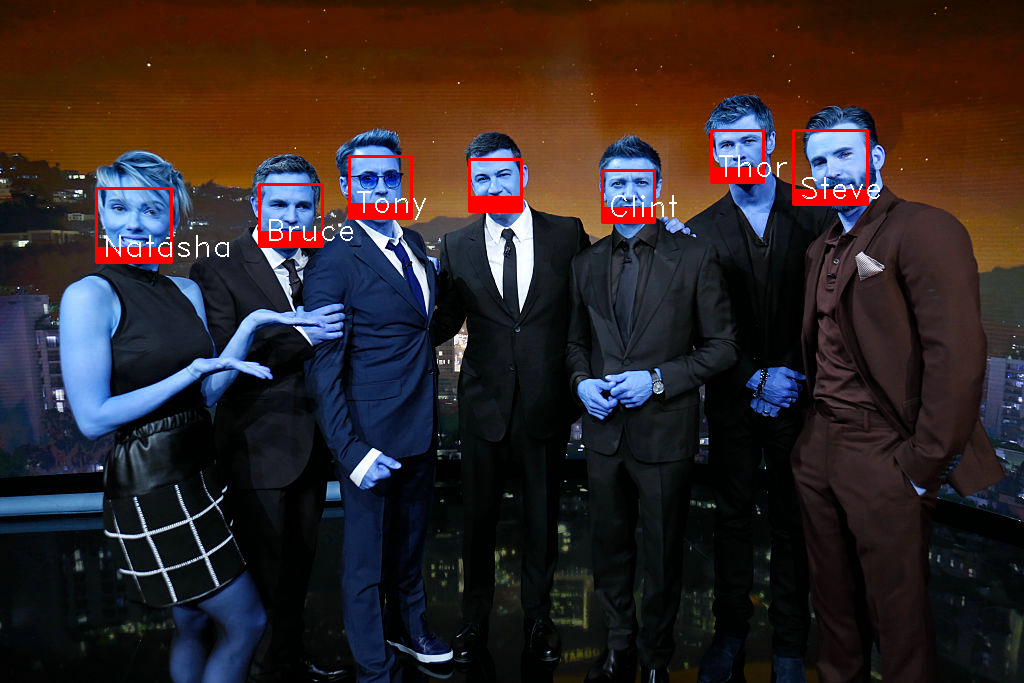

In [ ]:
cv2_imshow(image)
cv2.imwrite("gdrive/My Drive/DGT301/input/output.jpg", image)
cv2.waitKey(0)
cv2.destroyAllWindows()